In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import root_mean_squared_error, accuracy_score, mean_squared_error, mean_absolute_error, classification_report, confusion_matrix
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\admin\\OneDrive\\Desktop\\PROJECTS\\Software Engineer Developer Salary Prediction App\\survey_results_public.csv")

In [3]:
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [4]:
df = df[['Country', 'EdLevel', 'YearsCodePro', 'LanguageHaveWorkedWith', 'DevType' , 'Employment','ConvertedCompYearly']]

In [5]:
df

,Country,EdLevel,YearsCodePro,LanguageHaveWorkedWith,DevType,Employment,ConvertedCompYearly
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,HTML/CSS;JavaScript;Python,"Senior Executive (C-Suite, VP, etc.)","Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,Bash/Shell (all shells);Go,"Developer, back-end","Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,"Developer, front-end","Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,HTML/CSS;JavaScript;TypeScript,"Developer, full-stack","Employed, full-time;Independent contractor, fr...",23456.0
...,...,...,...,...,...,...,...
89179,Brazil,"Associate degree (A.A., A.S., etc.)",5,HTML/CSS;Java;JavaScript;SQL;TypeScript,"Developer, front-end","Employed, full-time;Independent contractor, fr...",NaN
89180,Romania,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,Dart;Java;Python;SQL,"Developer, back-end","Student, full-time;Employed, part-time",NaN
89181,Israel,Something else,NaN,Assembly;Bash/Shell (all shells);C;C#;Python;R...,NaN,I prefer not to say,NaN
89182,Switzerland,"Secondary school (e.g. American high school, G...",NaN,Bash/Shell (all shells);C#;HTML/CSS;Java;JavaS...,System administrator,"Employed, part-time;Student, part-time",NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 87973 non-null  object 
 1   EdLevel                 87973 non-null  object 
 2   YearsCodePro            66136 non-null  object 
 3   LanguageHaveWorkedWith  87140 non-null  object 
 4   DevType                 76872 non-null  object 
 5   Employment              87898 non-null  object 
 6   ConvertedCompYearly     48019 non-null  float64
dtypes: float64(1), object(6)
memory usage: 4.8+ MB


In [7]:
df = df[df['ConvertedCompYearly'].notnull()]

In [8]:
df

,Country,EdLevel,YearsCodePro,LanguageHaveWorkedWith,DevType,Employment,ConvertedCompYearly
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,HTML/CSS;JavaScript;Python,"Senior Executive (C-Suite, VP, etc.)","Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,Bash/Shell (all shells);Go,"Developer, back-end","Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,"Developer, front-end","Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,HTML/CSS;JavaScript;TypeScript,"Developer, full-stack","Employed, full-time;Independent contractor, fr...",23456.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,"Developer, back-end","Employed, full-time",96828.0
...,...,...,...,...,...,...,...
89162,Brazil,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",24,C;C++,"Developer, back-end","Employed, full-time",50719.0
89166,Armenia,Some college/university study without earning ...,2,Assembly;Bash/Shell (all shells);C;C#;C++;Java...,"Developer, full-stack","Employed, full-time;Independent contractor, fr...",16917.0
89167,India,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Dart;HTML/CSS;JavaScript;TypeScript,"Developer, mobile","Employed, full-time",15752.0
89170,France,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",9,C#;F#;HTML/CSS;JavaScript;SQL;TypeScript,Other (please specify):,"Employed, full-time",64254.0


In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

Country                   0
EdLevel                   0
YearsCodePro              0
LanguageHaveWorkedWith    0
DevType                   0
Employment                0
ConvertedCompYearly       0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47597 entries, 1 to 89171
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 47597 non-null  object 
 1   EdLevel                 47597 non-null  object 
 2   YearsCodePro            47597 non-null  object 
 3   LanguageHaveWorkedWith  47597 non-null  object 
 4   DevType                 47597 non-null  object 
 5   Employment              47597 non-null  object 
 6   ConvertedCompYearly     47597 non-null  float64
dtypes: float64(1), object(6)
memory usage: 2.9+ MB


In [12]:
df

,Country,EdLevel,YearsCodePro,LanguageHaveWorkedWith,DevType,Employment,ConvertedCompYearly
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,HTML/CSS;JavaScript;Python,"Senior Executive (C-Suite, VP, etc.)","Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,Bash/Shell (all shells);Go,"Developer, back-end","Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,"Developer, front-end","Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,HTML/CSS;JavaScript;TypeScript,"Developer, full-stack","Employed, full-time;Independent contractor, fr...",23456.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,"Developer, back-end","Employed, full-time",96828.0
...,...,...,...,...,...,...,...
89162,Brazil,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",24,C;C++,"Developer, back-end","Employed, full-time",50719.0
89166,Armenia,Some college/university study without earning ...,2,Assembly;Bash/Shell (all shells);C;C#;C++;Java...,"Developer, full-stack","Employed, full-time;Independent contractor, fr...",16917.0
89167,India,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Dart;HTML/CSS;JavaScript;TypeScript,"Developer, mobile","Employed, full-time",15752.0
89170,France,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",9,C#;F#;HTML/CSS;JavaScript;SQL;TypeScript,Other (please specify):,"Employed, full-time",64254.0


In [13]:
df['Employment'].unique()

array(['Employed, full-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Independent contractor, freelancer, or self-employed',
       'Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time;Employed, part-time',
       'Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Independent contractor, freelancer, or self-employed;Employed, part-time;Retired',
       'Independent contractor, freelancer, or self-employed;Retired',
       'Employed, full-time;Retired', 'Employed, part-time;Retired',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Retired'],
      dtype=object)

In [14]:
df['Country'].unique()

array(['United States of America', 'Philippines',
       'United Kingdom of Great Britain and Northern Ireland', 'Finland',
       'Australia', 'Netherlands', 'Germany', 'Sweden', 'France',
       'Albania', 'Nigeria', 'Spain', 'South Africa', 'Brazil',
       'Portugal', 'Italy', 'Bangladesh', 'Canada', 'Argentina',
       'Switzerland', 'Sri Lanka', 'Lithuania', 'Serbia', 'Cyprus',
       'India', 'Egypt', 'Latvia', 'Russian Federation', 'Greece',
       'Austria', 'Norway', 'Singapore', 'Turkey', 'Croatia', 'Poland',
       'Iran, Islamic Republic of...', 'Kosovo', 'Nepal', 'Slovenia',
       'China', 'Belgium', 'Romania', 'Denmark', 'Hungary',
       'Republic of Korea', 'Viet Nam', 'Israel', 'Ukraine', 'Nomadic',
       'Dominican Republic', 'Isle of Man', 'Estonia', 'Morocco',
       'The former Yugoslav Republic of Macedonia', 'Uzbekistan',
       'Luxembourg', 'Indonesia', 'Ireland', 'Georgia', 'Benin', 'Japan',
       'Venezuela, Bolivarian Republic of...', 'Bahrain', 'Tajikis

In [15]:
df['Employment'].value_counts()

Employment
Employed, full-time                                                                             39033
Independent contractor, freelancer, or self-employed                                             3864
Employed, full-time;Independent contractor, freelancer, or self-employed                         3276
Employed, part-time                                                                               893
Independent contractor, freelancer, or self-employed;Employed, part-time                          238
Employed, full-time;Employed, part-time                                                           152
Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time      109
Independent contractor, freelancer, or self-employed;Retired                                       16
Employed, full-time;Retired                                                                         7
Employed, full-time;Independent contractor, freelancer, or self-employe

In [16]:
df['Country'].value_counts().head(50)

Country
United States of America                                11788
Germany                                                  3943
United Kingdom of Great Britain and Northern Ireland     3510
Canada                                                   2088
India                                                    1841
France                                                   1785
Netherlands                                              1355
Poland                                                   1263
Brazil                                                   1244
Australia                                                1201
Spain                                                    1133
Sweden                                                   1051
Italy                                                    1004
Switzerland                                               655
Austria                                                   526
Denmark                                                   514


In [17]:
def country_cutoffs(country, cutoff):
    map = {}
    for i in range(len(country)):
        if country.values[i] >= cutoff:
            map[country.index[i]] = country.index[i]
        else:
            map[country.index[i]] = 'Others'
    return map

In [18]:
countries = country_cutoffs(df.Country.value_counts(), 350)
print(countries)

{'United States of America': 'United States of America', 'Germany': 'Germany', 'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom of Great Britain and Northern Ireland', 'Canada': 'Canada', 'India': 'India', 'France': 'France', 'Netherlands': 'Netherlands', 'Poland': 'Poland', 'Brazil': 'Brazil', 'Australia': 'Australia', 'Spain': 'Spain', 'Sweden': 'Sweden', 'Italy': 'Italy', 'Switzerland': 'Switzerland', 'Austria': 'Austria', 'Denmark': 'Denmark', 'Czech Republic': 'Czech Republic', 'Norway': 'Norway', 'Portugal': 'Portugal', 'Israel': 'Israel', 'Belgium': 'Belgium', 'Finland': 'Finland', 'Russian Federation': 'Russian Federation', 'Ukraine': 'Ukraine', 'New Zealand': 'New Zealand', 'Romania': 'Romania', 'Turkey': 'Turkey', 'South Africa': 'Others', 'Greece': 'Others', 'Mexico': 'Others', 'Hungary': 'Others', 'Ireland': 'Others', 'Colombia': 'Others', 'Argentina': 'Others', 'Pakistan': 'Others', 'Bulgaria': 'Others', 'Iran, Islamic Republic of...': 'Others', 'Ser

In [19]:
df['Country'] = df['Country'].map(countries)

C:\Users\admin\AppData\Local\Temp\ipykernel_4444\3198646959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country'] = df['Country'].map(countries)


In [20]:
df['Country'].value_counts()

Country
United States of America                                11788
Others                                                   7868
Germany                                                  3943
United Kingdom of Great Britain and Northern Ireland     3510
Canada                                                   2088
India                                                    1841
France                                                   1785
Netherlands                                              1355
Poland                                                   1263
Brazil                                                   1244
Australia                                                1201
Spain                                                    1133
Sweden                                                   1051
Italy                                                    1004
Switzerland                                               655
Austria                                                   526


In [21]:
df

,Country,EdLevel,YearsCodePro,LanguageHaveWorkedWith,DevType,Employment,ConvertedCompYearly
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,HTML/CSS;JavaScript;Python,"Senior Executive (C-Suite, VP, etc.)","Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,Bash/Shell (all shells);Go,"Developer, back-end","Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,"Developer, front-end","Employed, full-time",156000.0
4,Others,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,HTML/CSS;JavaScript;TypeScript,"Developer, full-stack","Employed, full-time;Independent contractor, fr...",23456.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,"Developer, back-end","Employed, full-time",96828.0
...,...,...,...,...,...,...,...
89162,Brazil,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",24,C;C++,"Developer, back-end","Employed, full-time",50719.0
89166,Others,Some college/university study without earning ...,2,Assembly;Bash/Shell (all shells);C;C#;C++;Java...,"Developer, full-stack","Employed, full-time;Independent contractor, fr...",16917.0
89167,India,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Dart;HTML/CSS;JavaScript;TypeScript,"Developer, mobile","Employed, full-time",15752.0
89170,France,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",9,C#;F#;HTML/CSS;JavaScript;SQL;TypeScript,Other (please specify):,"Employed, full-time",64254.0


[]

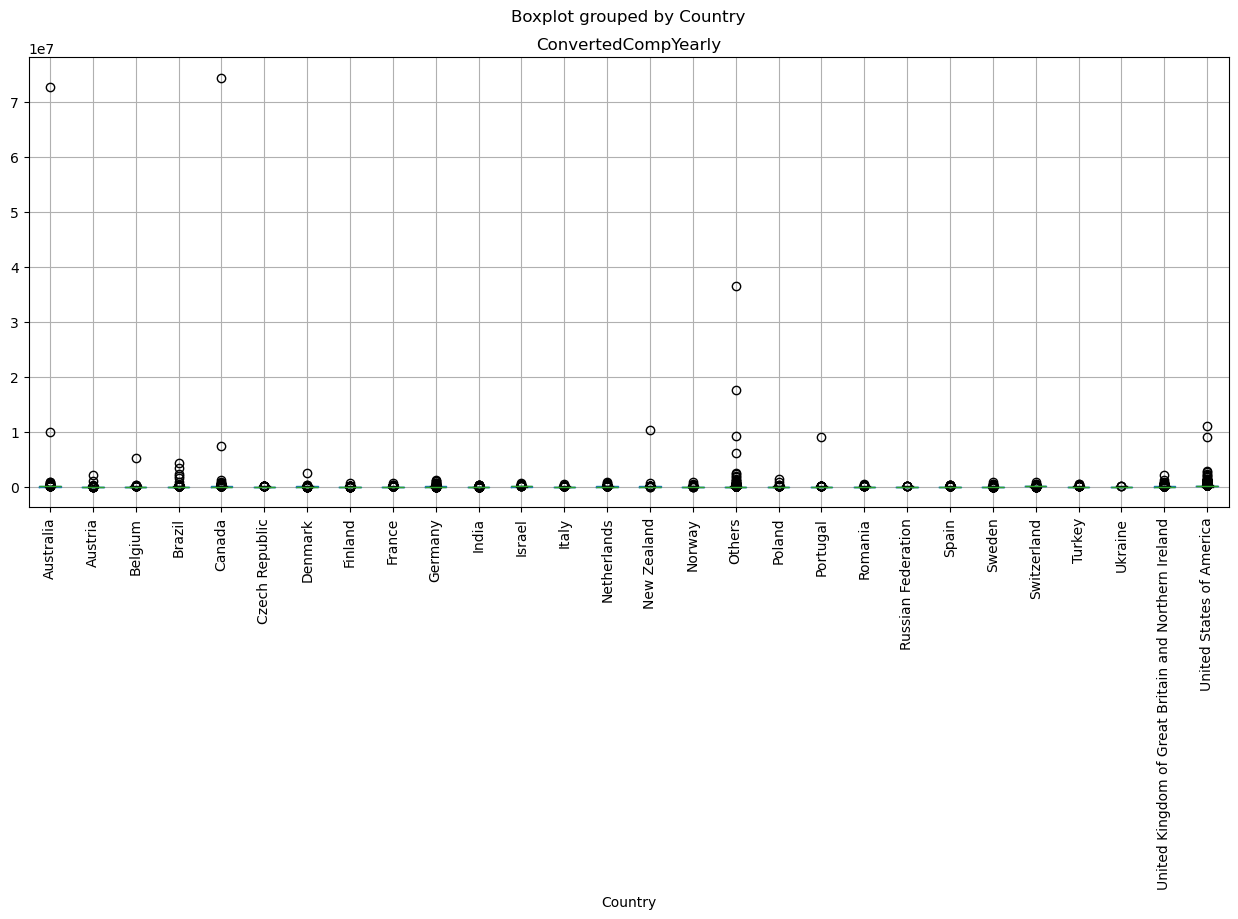

In [22]:
fig , ax = plt.subplots(1,1, figsize=(15,6))
df.boxplot('ConvertedCompYearly', 'Country' ,ax=ax)
plt.xticks(rotation=90)
plt.plot()

In [23]:
df = df[df['Country'] != 'Others']

In [24]:
df

,Country,EdLevel,YearsCodePro,LanguageHaveWorkedWith,DevType,Employment,ConvertedCompYearly
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,HTML/CSS;JavaScript;Python,"Senior Executive (C-Suite, VP, etc.)","Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,Bash/Shell (all shells);Go,"Developer, back-end","Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,"Developer, front-end","Employed, full-time",156000.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,"Developer, back-end","Employed, full-time",96828.0
6,United States of America,Some college/university study without earning ...,3,Ada;Clojure;Elixir;Go;HTML/CSS;Java;JavaScript...,"Developer, full-stack","Employed, full-time",135000.0
...,...,...,...,...,...,...,...
89157,Canada,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,Java;Kotlin,"Developer, mobile","Employed, full-time",319711.0
89158,Sweden,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,TypeScript,"Developer, front-end","Employed, full-time",52981.0
89162,Brazil,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",24,C;C++,"Developer, back-end","Employed, full-time",50719.0
89167,India,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Dart;HTML/CSS;JavaScript;TypeScript,"Developer, mobile","Employed, full-time",15752.0


[]

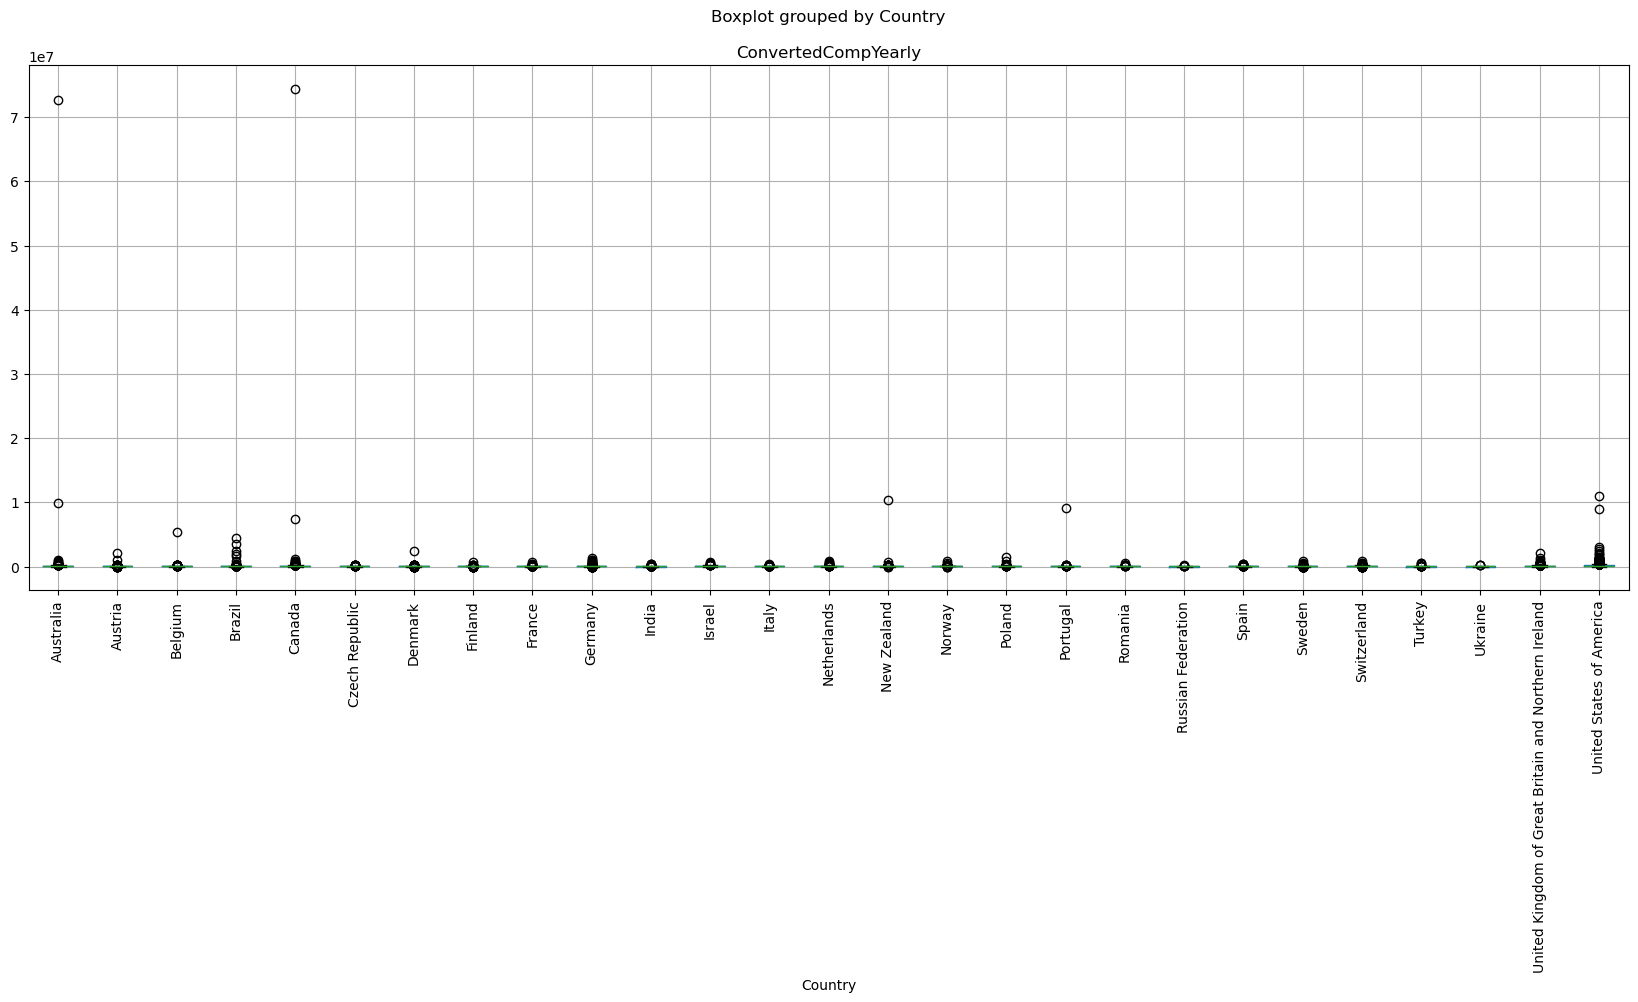

In [25]:
fig, ax = plt.subplots(1,1, figsize=(20,7))
df.boxplot('ConvertedCompYearly', 'Country', ax=ax)
plt.xticks(rotation = 90)
plt.plot()

In [26]:
df = df[df['ConvertedCompYearly'] <= 150000]

[]

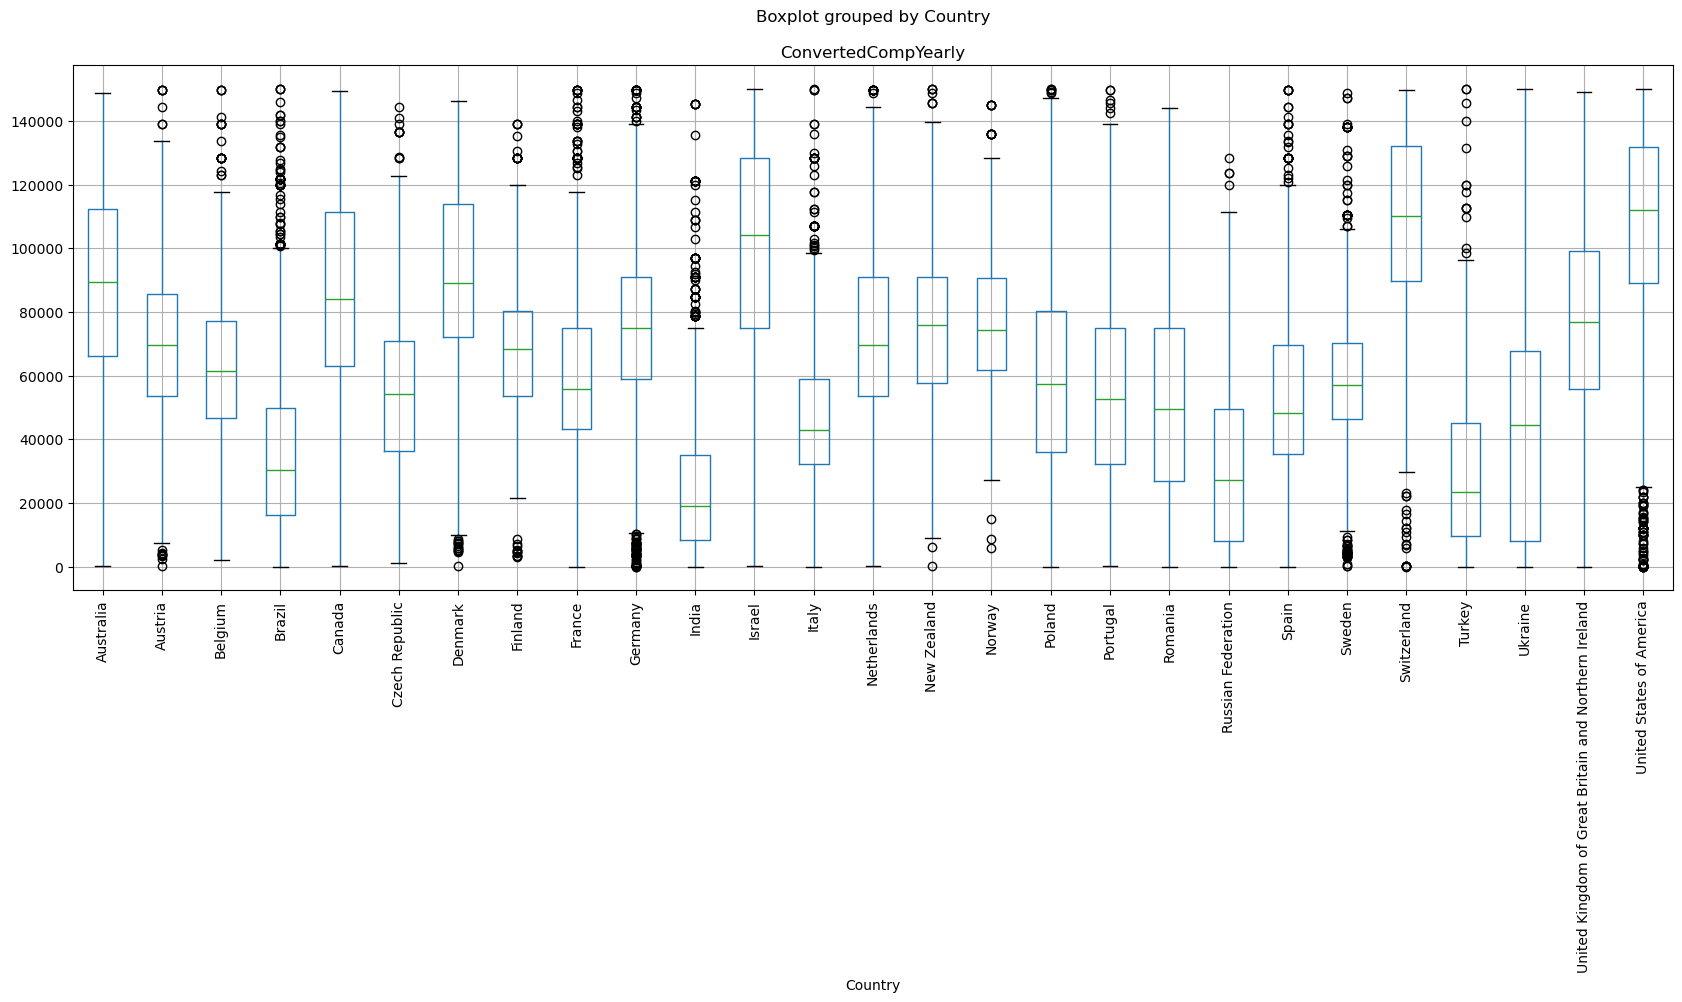

In [27]:
fig, ax = plt.subplots(1,1, figsize=(20,7))
df.boxplot('ConvertedCompYearly', 'Country', ax=ax)
plt.xticks(rotation = 90)
plt.plot()

In [28]:
df.YearsCodePro.unique()

array(['21', '3', '15', '9', 'Less than 1 year', '10', '2', '6', '14',
       '5', '7', '13', '28', '30', '24', '17', '4', '25', '23', '12',
       '11', '8', '18', '20', '19', '26', '1', '38', '33', '29', '22',
       '27', '35', '31', '34', '16', '37', '42', '39', '36', '40', '41',
       '32', '44', '48', '45', '50', '43', '46', 'More than 50 years',
       '47', '49'], dtype=object)

In [29]:
def experience(Years):
    if Years == 'More than 50 years':
        return 50
    if Years == 'Less than 1 year':
        return 0.5
    return float(Years)
    

In [30]:
df['YearsCodePro'] = df['YearsCodePro'].apply(experience)

C:\Users\admin\AppData\Local\Temp\ipykernel_4444\1546103118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YearsCodePro'] = df['YearsCodePro'].apply(experience)


In [31]:
df.YearsCodePro.unique()

array([21. ,  3. , 15. ,  9. ,  0.5, 10. ,  2. ,  6. , 14. ,  5. ,  7. ,
       13. , 28. , 30. , 24. , 17. ,  4. , 25. , 23. , 12. , 11. ,  8. ,
       18. , 20. , 19. , 26. ,  1. , 38. , 33. , 29. , 22. , 27. , 35. ,
       31. , 34. , 16. , 37. , 42. , 39. , 36. , 40. , 41. , 32. , 44. ,
       48. , 45. , 50. , 43. , 46. , 47. , 49. ])

In [32]:
df['EdLevel'].unique()

array(['Some college/university study without earning a degree',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Primary/elementary school', 'Something else'], dtype=object)

In [33]:
def degree_status(degree):
    if degree == 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)':
        return 'Bachelor’s degree'
    if degree == 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)':
        return 'Master’s degree'
    if degree == 'Associate degree (A.A., A.S., etc.)':
        return 'Associate degree'
    else:
        return "Less than a Bachelor's Degree"

In [34]:
df['EdLevel'] = df['EdLevel'].apply(degree_status)

C:\Users\admin\AppData\Local\Temp\ipykernel_4444\231743273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EdLevel'] = df['EdLevel'].apply(degree_status)


In [35]:
df['EdLevel'].unique()

array(["Less than a Bachelor's Degree", 'Bachelor’s degree',
       'Master’s degree', 'Associate degree'], dtype=object)

In [36]:
df['DevType'].unique()

array(['Developer, back-end', 'Developer, full-stack',
       'System administrator', 'Developer, QA or test',
       'Developer, front-end',
       'Data scientist or machine learning specialist',
       'Data or business analyst', 'Research & Development role',
       'Database administrator',
       'Developer, desktop or enterprise applications', 'Engineer, data',
       'Security professional', 'Product manager',
       'Cloud infrastructure engineer',
       'Developer, embedded applications or devices',
       'Developer Experience', 'Engineering manager',
       'Other (please specify):', 'Developer, mobile',
       'DevOps specialist', 'Senior Executive (C-Suite, VP, etc.)',
       'Engineer, site reliability', 'Project manager',
       'Academic researcher', 'Blockchain', 'Developer, game or graphics',
       'Hardware Engineer', 'Educator', 'Scientist', 'Developer Advocate',
       'Designer', 'Student', 'Marketing or sales professional'],
      dtype=object)

In [37]:
df = df[df['DevType'] != 'Other (please specify):']

In [38]:
df['DevType'].unique()

array(['Developer, back-end', 'Developer, full-stack',
       'System administrator', 'Developer, QA or test',
       'Developer, front-end',
       'Data scientist or machine learning specialist',
       'Data or business analyst', 'Research & Development role',
       'Database administrator',
       'Developer, desktop or enterprise applications', 'Engineer, data',
       'Security professional', 'Product manager',
       'Cloud infrastructure engineer',
       'Developer, embedded applications or devices',
       'Developer Experience', 'Engineering manager', 'Developer, mobile',
       'DevOps specialist', 'Senior Executive (C-Suite, VP, etc.)',
       'Engineer, site reliability', 'Project manager',
       'Academic researcher', 'Blockchain', 'Developer, game or graphics',
       'Hardware Engineer', 'Educator', 'Scientist', 'Developer Advocate',
       'Designer', 'Student', 'Marketing or sales professional'],
      dtype=object)

In [39]:
df['LanguageHaveWorkedWith'].unique()

array(['Bash/Shell (all shells);HTML/CSS;JavaScript;Ruby;SQL;TypeScript',
       'Ada;Clojure;Elixir;Go;HTML/CSS;Java;JavaScript;Lisp;OCaml;Raku;Ruby;Scala;Swift;TypeScript;Zig',
       'Go;HTML/CSS;JavaScript;Python;Rust;SQL;TypeScript', ...,
       'Bash/Shell (all shells);C;C#;HTML/CSS;JavaScript;PHP;Python',
       'Assembly;C;C++;Lisp;Perl;Python;Raku;Ruby;Scala;SQL',
       'Bash/Shell (all shells);C#;Dart;HTML/CSS;Java;JavaScript;PowerShell;SQL'],
      dtype=object)

In [40]:
df['Employment'].unique()

array(['Employed, full-time',
       'Independent contractor, freelancer, or self-employed',
       'Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Employed, full-time;Employed, part-time',
       'Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Independent contractor, freelancer, or self-employed;Retired',
       'Employed, full-time;Retired', 'Employed, part-time;Retired',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Retired'],
      dtype=object)

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
le_education = LabelEncoder()

In [43]:
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])

In [44]:
df['EdLevel'].unique()

array([2, 1, 3, 0])

In [45]:
from sklearn.preprocessing import LabelEncoder
le_country = LabelEncoder()

In [46]:
df['Country'] = le_country.fit_transform(df['Country'])

In [47]:
df['Country'].unique()

array([25, 26,  7,  0,  9, 21,  8, 20,  3, 17, 12,  4, 22, 13, 10, 19,  1,
       15, 23, 16,  2, 18,  6, 11, 24,  5, 14])

In [48]:
from sklearn.preprocessing import LabelEncoder
le_devtype = LabelEncoder()

In [49]:
df['DevType'] = le_devtype.fit_transform(df['DevType'])

In [50]:
df['DevType'].unique()

array([11, 15, 31, 10, 14,  4,  3, 26,  5, 12, 19, 28, 24,  2, 13,  9, 21,
       17,  7, 29, 20, 25,  0,  1, 16, 22, 18, 27,  8,  6, 30, 23])

In [51]:
df

,Country,EdLevel,YearsCodePro,LanguageHaveWorkedWith,DevType,Employment,ConvertedCompYearly
5,25,2,21.0,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,11,"Employed, full-time",96828.0
6,26,2,3.0,Ada;Clojure;Elixir;Go;HTML/CSS;Java;JavaScript...,15,"Employed, full-time",135000.0
7,26,1,3.0,Go;HTML/CSS;JavaScript;Python;Rust;SQL;TypeScript,15,"Employed, full-time",80000.0
8,7,3,15.0,C#;JavaScript;PowerShell;Ruby;TypeScript,31,"Employed, full-time",64254.0
11,0,1,9.0,C#;HTML/CSS;JavaScript;Kotlin;PowerShell;Pytho...,15,"Employed, full-time",78003.0
...,...,...,...,...,...,...,...
89154,26,1,8.0,HTML/CSS;JavaScript;PHP;TypeScript;Visual Basi...,14,"Employed, full-time",75000.0
89155,4,2,0.5,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,15,"Employed, full-time",63199.0
89158,21,1,8.0,TypeScript,14,"Employed, full-time",52981.0
89162,3,3,24.0,C;C++,11,"Employed, full-time",50719.0


In [52]:
from sklearn.preprocessing import LabelEncoder
le_employment = LabelEncoder()

In [53]:
df['Employment'] = le_employment.fit_transform(df['Employment'])

In [54]:
df['Employment'].unique()

array([ 0,  8,  6,  2,  1,  9,  3, 10,  5,  7,  4])

In [55]:
df.drop('LanguageHaveWorkedWith', axis=1, inplace=True)

In [56]:
df

,Country,EdLevel,YearsCodePro,DevType,Employment,ConvertedCompYearly
5,25,2,21.0,11,0,96828.0
6,26,2,3.0,15,0,135000.0
7,26,1,3.0,15,0,80000.0
8,7,3,15.0,31,0,64254.0
11,0,1,9.0,15,0,78003.0
...,...,...,...,...,...,...
89154,26,1,8.0,14,0,75000.0
89155,4,2,0.5,15,0,63199.0
89158,21,1,8.0,14,0,52981.0
89162,3,3,24.0,11,0,50719.0


In [57]:
x = df.drop('ConvertedCompYearly', axis =1)
y = df['ConvertedCompYearly']

In [58]:
from sklearn.linear_model import LinearRegression
lin_r = LinearRegression()
lin_r.fit(x,y.values)

LinearRegression()

In [59]:
y_pred = lin_r.predict(x)

In [60]:
rms_error = root_mean_squared_error(y,y_pred)
ms_error = mean_squared_error(y,y_pred)

In [61]:
rms_error

34541.506670700786

In [62]:
ms_error

1193115683.0820668

In [63]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt.fit(x,y)

DecisionTreeRegressor(random_state=0)

In [64]:
y_pred = dt.predict(x)

In [65]:
rms_error = root_mean_squared_error(y,y_pred)
ms_error = mean_squared_error(y,y_pred)
print('Root Mean Squared Error is', rms_error)
print('Mean Squared Error is', ms_error)

Root Mean Squared Error is 16480.18679924825
Mean Squared Error is 271596556.9381164


In [66]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf.fit(x,y)

RandomForestRegressor(random_state=0)

In [67]:
y_pred = rf.predict(x)

In [68]:
rms_error = root_mean_squared_error(y,y_pred)
ms_error = mean_squared_error(y,y_pred)
print('Root Mean Squared Error is', rms_error)
print('Mean Squared Error is', ms_error)

Root Mean Squared Error is 17770.183905786682
Mean Squared Error is 315779436.04547995


In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
parameters = {"max_depth":(list(range(1, 10)))}

In [71]:
regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(x,y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='neg_mean_squared_error')

In [72]:
gs.best_estimator_

DecisionTreeRegressor(max_depth=9, random_state=0)

In [73]:
regressor = gs.best_estimator_

regressor.fit(x,y.values)
y_pred = regressor.predict(x)

In [74]:
rms_error = root_mean_squared_error(y,y_pred)
ms_error = mean_squared_error(y,y_pred)
print('Root Mean Squared Error is', rms_error)
print('Mean Squared Error is', ms_error)

Root Mean Squared Error is 25944.38459634813
Mean Squared Error is 673111092.0832261


In [75]:
x

,Country,EdLevel,YearsCodePro,DevType,Employment
5,25,2,21.0,11,0
6,26,2,3.0,15,0
7,26,1,3.0,15,0
8,7,3,15.0,31,0
11,0,1,9.0,15,0
...,...,...,...,...,...
89154,26,1,8.0,14,0
89155,4,2,0.5,15,0
89158,21,1,8.0,14,0
89162,3,3,24.0,11,0


In [183]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31528 entries, 5 to 89167
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       31528 non-null  int32  
 1   EdLevel       31528 non-null  int32  
 2   YearsCodePro  31528 non-null  float64
 3   DevType       31528 non-null  int32  
 4   Employment    31528 non-null  int32  
dtypes: float64(1), int32(4)
memory usage: 985.2 KB


In [77]:
import pickle

In [187]:
data = {"model":dt , "le_country":le_country , "le_devtype":le_devtype , "le_education":le_education , "le_employment":le_employment }
with open("saved_steps.pkl","wb") as file:
    pickle.dump(data,file)

In [191]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_devtype = data["le_devtype"]
le_education = data["le_education"]
le_employment = data["le_employment"]

In [197]:
y_pred = regressor_loaded.predict(x)
y_pred

array([109862.5       ,  94592.59259259, 100902.046875  , ...,
        51829.5       ,  50719.        ,   6810.66666667])

In [199]:
rms_error = root_mean_squared_error(y,y_pred)
ms_error = mean_squared_error(y,y_pred)
print('Root Mean Squared Error is', rms_error)
print('Mean Squared Error is', ms_error)

Root Mean Squared Error is 16480.18679924825
Mean Squared Error is 271596556.9381164
